# My DCT

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as fft
from time import time

In [58]:
test = [231, 32, 233, 161, 24, 71, 140, 245]
dct_test = fft.dct(test, norm='ortho')
dct_test

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [59]:
mat = [[231, 32, 233, 161, 24, 71, 140, 245], 
         [247, 40, 248, 245, 124, 204, 36, 107], 
         [234, 202, 245, 167, 9, 217, 239, 173], 
         [193, 190, 100, 167, 43, 180, 8, 70], 
         [11, 24, 210, 177, 81, 243, 8, 112], 
         [97, 195, 203, 47, 125, 114, 165, 181], 
         [193, 70, 174, 167, 41, 30, 127, 245], 
         [87, 149, 57, 192, 65, 129, 178, 228]]

In [60]:
def dct2(A):
    return fft.dct(fft.dct(A, axis=0, norm='ortho'), axis=1, norm='ortho')

print(dct2(mat))

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

In [61]:
matrices = []
for N in range(10, 3000, 10):
    matrices.append(np.random.randint(0, 300, size=(N, N)))

KeyboardInterrupt: 

In [ ]:
def my_dct(v):
    N = len(v)
    a = [0] * N
    for k in range(0, N):
        for i in range(0, N):
            a[k] += np.cos(np.pi * k * ((2 * i + 1) / (2 * N))) * v[i]
        den = N / 2
        if(k == 0): den = N
        a[k] = (a[k] / den)
    return a

#def my_dct2(A)
print(my_dct(test))

[142.125, 3.300009952766274, 54.58368272214813, -56.39278928587562, 32.70368862987778, 60.91569901833404, 58.328244277432724, 14.400203608915222]


In [ ]:
times = list()
for m in matrices:
    start = time()
    dct2(m)
    end = time()
    time_dct2 = end - start
    times.append([len(m), time_dct2])

<AxesSubplot:xlabel='N', ylabel='Time'>

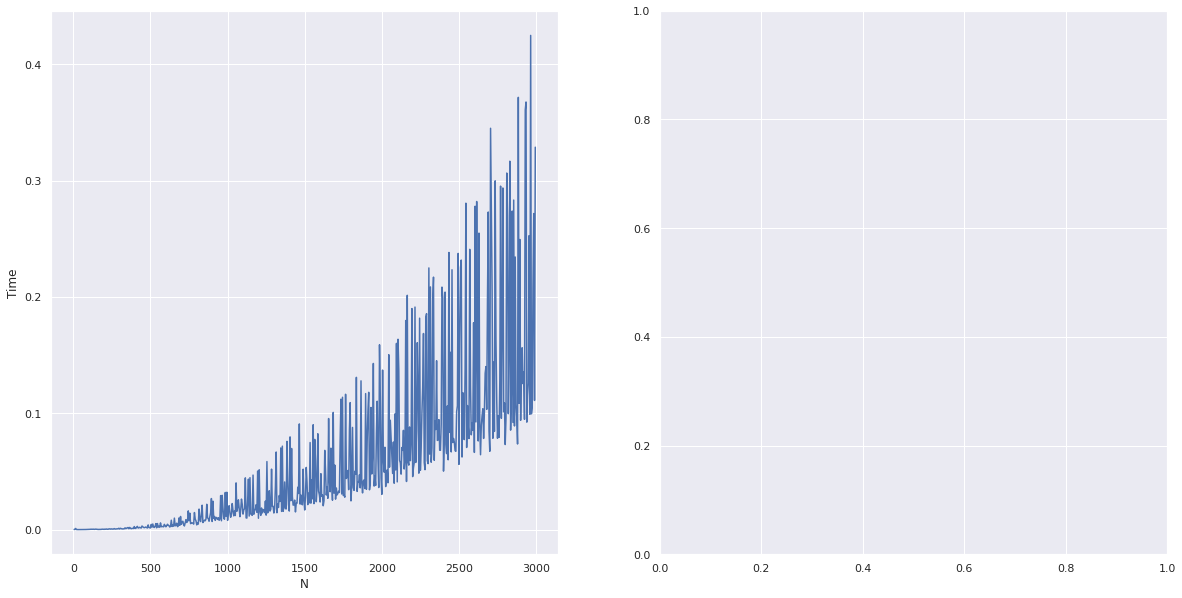

In [62]:
sns.set_theme(style="darkgrid")
df = pd.DataFrame(times, columns=['N', 'Time'])
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.lineplot(data=df, x="N", y="Time", ax=ax[0])
